<a href="https://colab.research.google.com/github/LeTam0101/TRI-TUE-NHAN-TAO/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Giữa kì/Food 

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Giữa kì/Food'
/content


In [4]:
# Tạo ra class ImageDataGenerator để chỉnh ảnh 
train_datagen=ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Giữa kì/Food /Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 3006 images belonging to 10 classes.


In [6]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Giữa kì/Food /Val',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 240 images belonging to 10 classes.


In [7]:
training_set.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [8]:
validation.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [9]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [10]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=20,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/20
94/94 [==============================] - 1886s 20s/step - loss: 2.5856 - accuracy: 0.1121 - val_loss: 2.2967 - val_accuracy: 0.1083
Epoch 2/20
94/94 [==============================] - 72s 768ms/step - loss: 2.1414 - accuracy: 0.2166 - val_loss: 1.7390 - val_accuracy: 0.4167
Epoch 3/20
94/94 [==============================] - 71s 750ms/step - loss: 1.8106 - accuracy: 0.3706 - val_loss: 1.4613 - val_accuracy: 0.5208
Epoch 4/20
94/94 [==============================] - 71s 752ms/step - loss: 1.5760 - accuracy: 0.4581 - val_loss: 1.3691 - val_accuracy: 0.5625
Epoch 5/20
94/94 [==============================] - 71s 750ms/step - loss: 1.3827 - accuracy: 0.5313 - val_loss: 1.0915 - val_accuracy: 0.6500
Epoch 6/20
94/94 [==============================] - 71s 759ms/step - loss: 1.2747 - accuracy: 0.5725 - val_loss: 0.8767 - val_accuracy: 0.7250
Epoch 7/20
94/94 [==============================] - 72s 764ms/step - loss: 1.1389 - accuracy: 0.6188 - val_loss: 0.7799 - val_accuracy: 0.7542

In [11]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.26895418763160706
Train Accuracy 0.910179615020752


In [12]:
# Lưu lại
model.save("Food.h5")

In [13]:
# Tải mô hình 
model_CNN=load_model('Food.h5')

1/1 [==============================] - 0s 370ms/step
Banh cuon


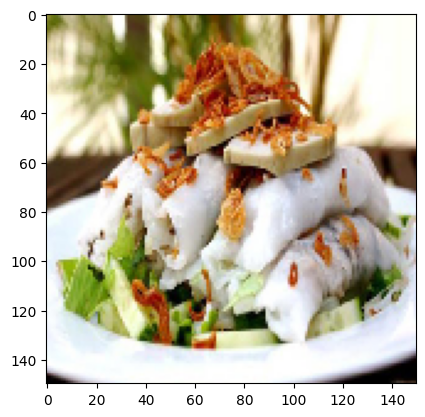

1/1 [==============================] - 0s 32ms/step
Banh cuon


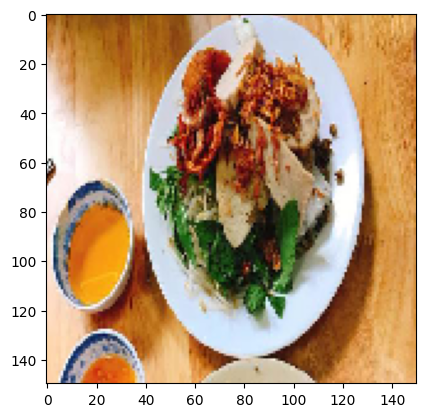

1/1 [==============================] - 0s 29ms/step
Banh cuon


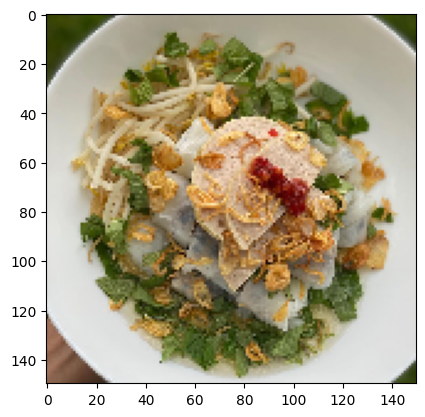

1/1 [==============================] - 0s 27ms/step
Banh mi


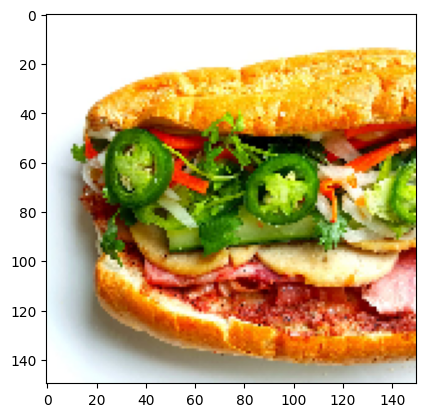

1/1 [==============================] - 0s 21ms/step
Banh mi


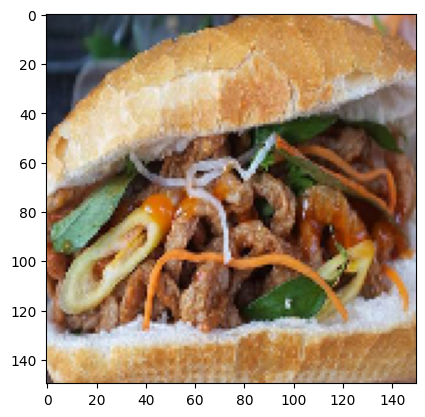

1/1 [==============================] - 0s 19ms/step
Banh mi


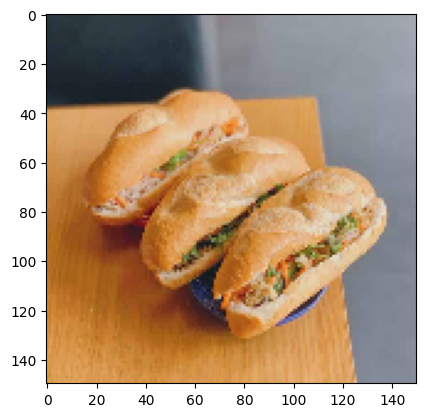

1/1 [==============================] - 0s 25ms/step
Banh tet


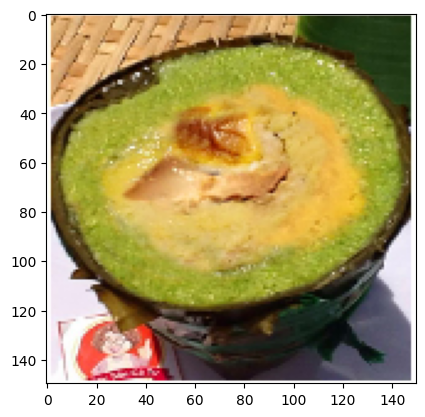

1/1 [==============================] - 0s 22ms/step
Banh pia


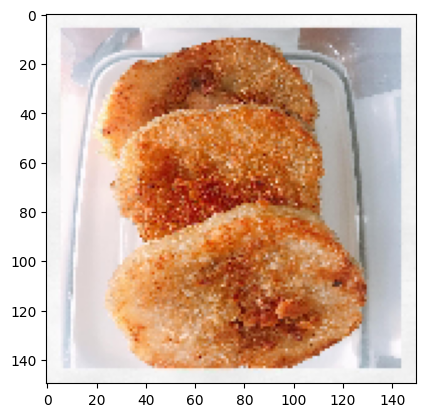

1/1 [==============================] - 0s 20ms/step
Banh tet


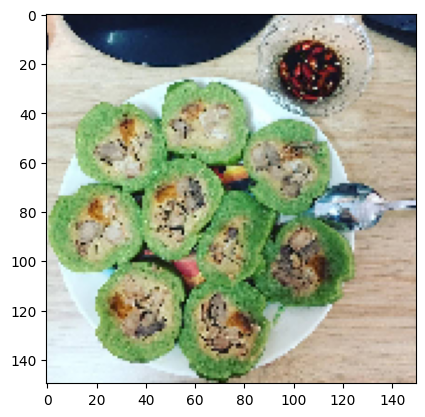

1/1 [==============================] - 0s 20ms/step
Banh xeo


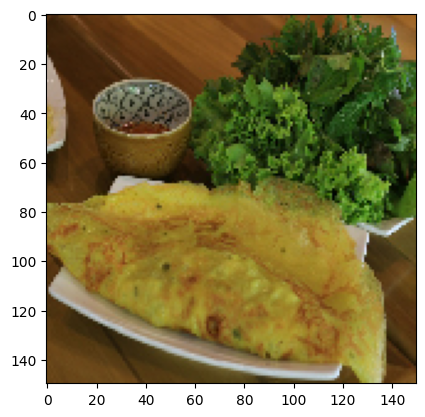

1/1 [==============================] - 0s 24ms/step
Banh xeo


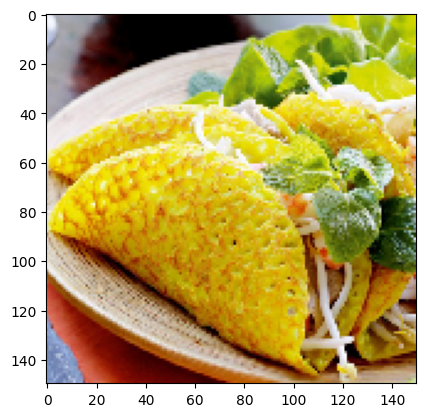

1/1 [==============================] - 0s 22ms/step
Banh xeo


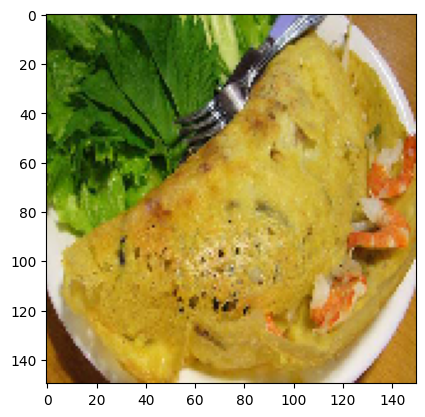

1/1 [==============================] - 0s 19ms/step
Bun dau mam tom


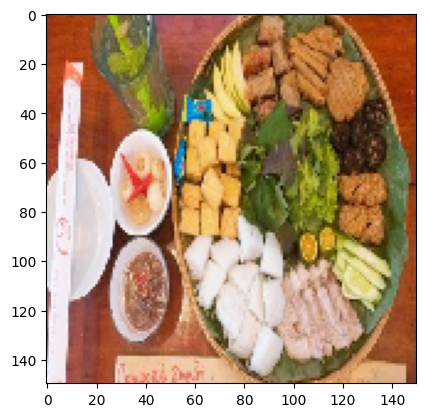

1/1 [==============================] - 0s 20ms/step
Bun dau mam tom


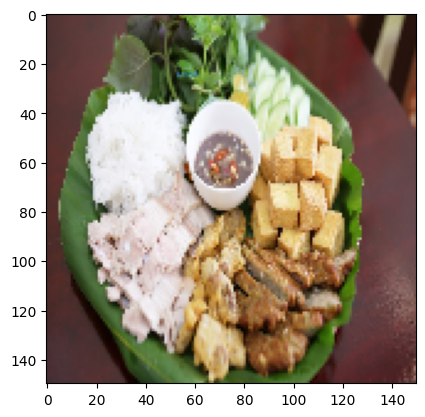

1/1 [==============================] - 0s 20ms/step
Bun dau mam tom


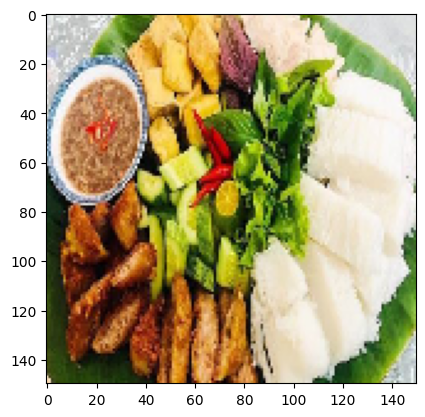

1/1 [==============================] - 0s 27ms/step
Ca kho to


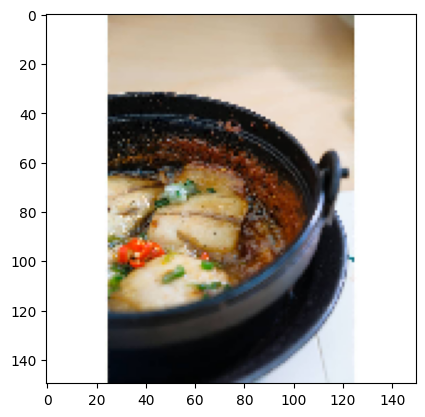

1/1 [==============================] - 0s 29ms/step
Ca kho to


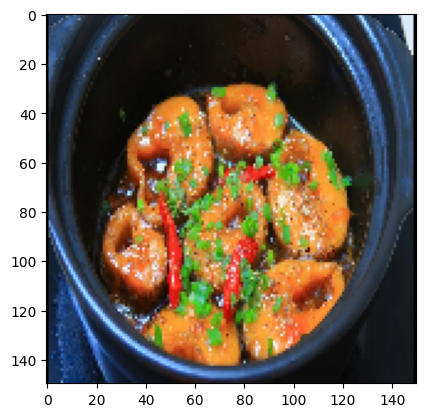

1/1 [==============================] - 0s 29ms/step
Ca kho to


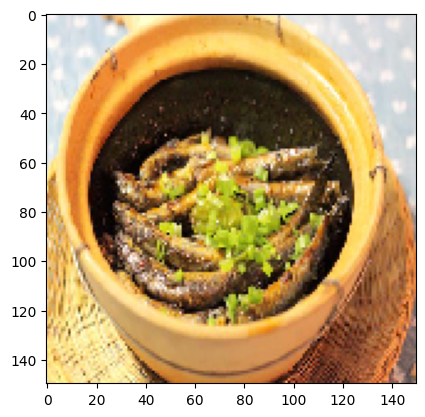

1/1 [==============================] - 0s 21ms/step
Nem


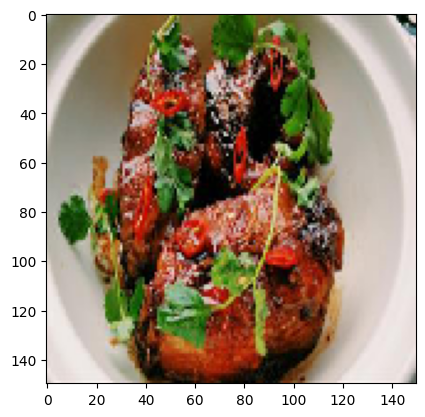

1/1 [==============================] - 0s 18ms/step
Ca kho to


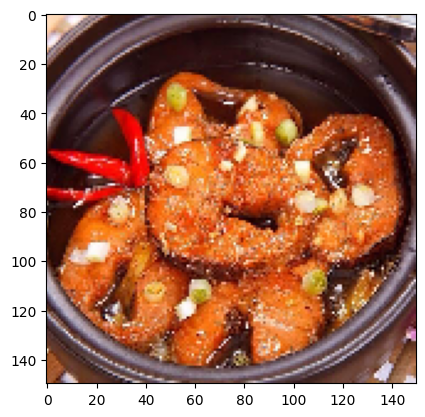

1/1 [==============================] - 0s 21ms/step
Ca kho to


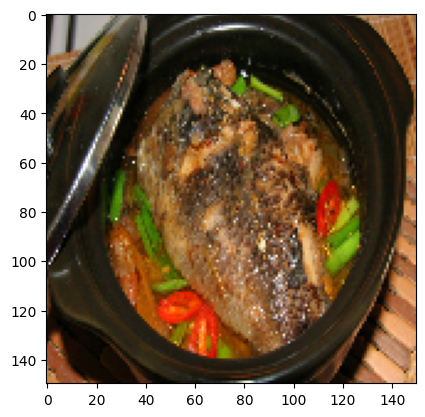

1/1 [==============================] - 0s 18ms/step
Banh xeo


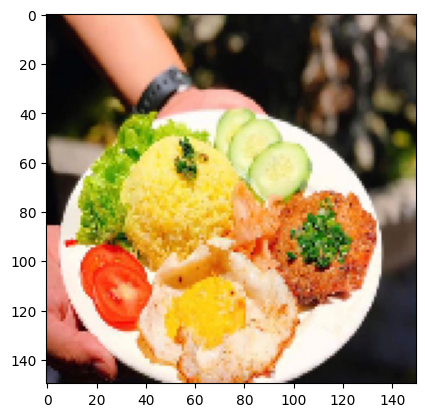

1/1 [==============================] - 0s 17ms/step
Com tam


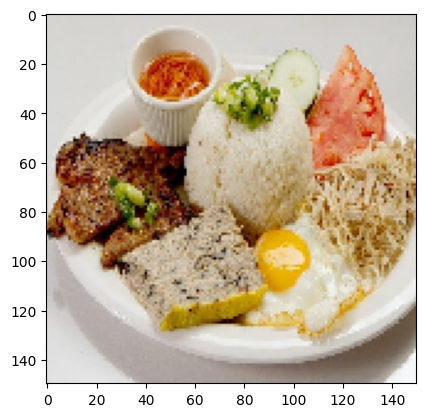

1/1 [==============================] - 0s 19ms/step
Com tam


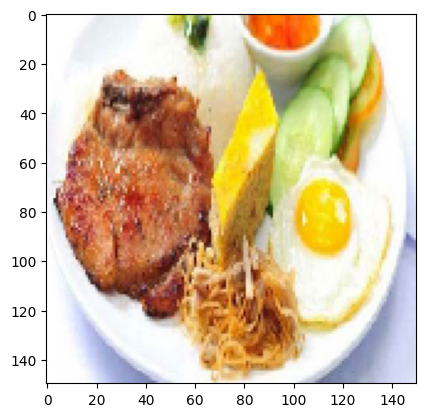

1/1 [==============================] - 0s 20ms/step
Nem


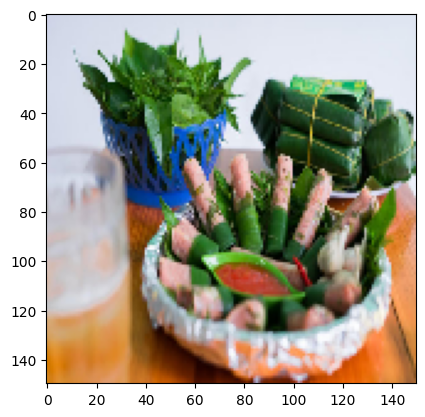

1/1 [==============================] - 0s 20ms/step
Nem


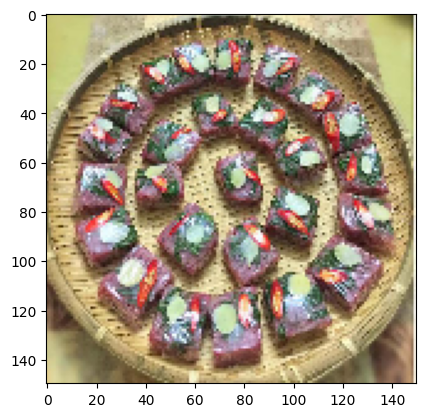

1/1 [==============================] - 0s 29ms/step
Nem


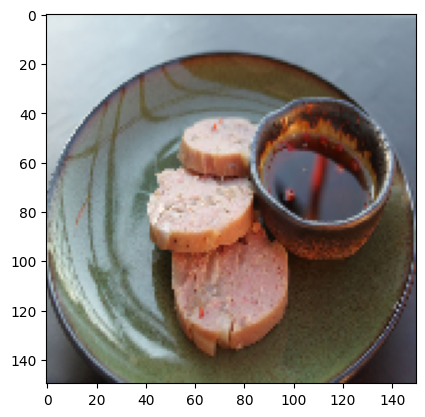

1/1 [==============================] - 0s 24ms/step
Pho


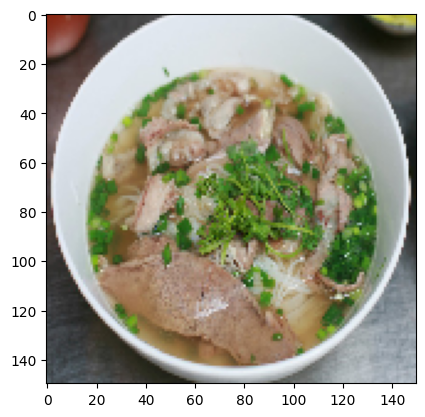

1/1 [==============================] - 0s 28ms/step
Pho


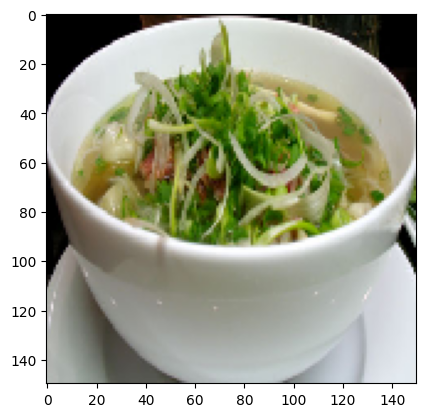

1/1 [==============================] - 0s 31ms/step
Pho


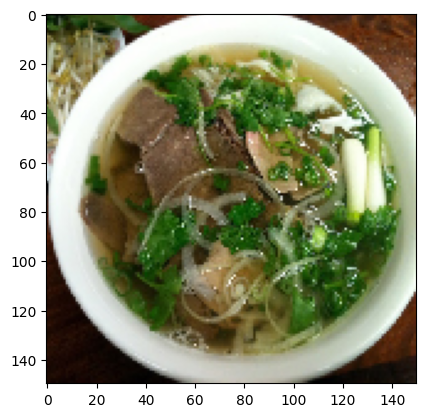

In [14]:
Test = "/content/drive/MyDrive/Colab Notebooks/Giữa kì/Food /Test"
for i in os.listdir(Test):
  img=load_img(Test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Banh cuon'
  if round(result[0][1])==1:
    prediction='Banh mi'
  if round(result[0][2])==1:
    prediction='Banh pia'
  if round(result[0][3])==1:
    prediction='Banh tet'
  if round(result[0][4])==1:
    prediction='Banh xeo'
  if round(result[0][5])==1:
    prediction='Bun dau mam tom'
  if round(result[0][6])==1:
    prediction='Ca kho to'
  if round(result[0][7])==1:
    prediction='Com tam'
  if round(result[0][8])==1:
    prediction='Nem'
  if round(result[0][9])==1:
    prediction='Pho'
  print(prediction)
  plt.show()

In [18]:
!jupyter nbconvert --to html "/content/Food.ipynb"

[NbConvertApp] Converting notebook /content/Food.ipynb to html
[NbConvertApp] Writing 9661331 bytes to /content/Food.html
